# Week 4 lab: 

## Aims of this computer lab

* To study the method of lines with forward and backward Euler for the heat equation.
* To examine the convergence and stability properties of these methods.

## Forward Euler method for the heat equation

Consider the partial differential equation
\begin{equation}\label{eqn:heat}
  u_t = u_{xx} \quad \textrm{ for } x \in \left( 0, 1 \right), t \in \left( 0, T \right),
\end{equation}
subject to an initial condition
\begin{equation}
  u \left( x, t = 0 \right) = \sin \left( 2 \pi x \right) + 2 \sin \left( 5 \pi x \right),
\end{equation}
and homogeneous Dirichlet boundary conditions
\begin{equation}
  u \left( x = 0, t \right) = u \left( x = 1, t \right) = 0.
\end{equation}

In this equation, you can view $u$ as temperature which is changing in time and space. 

Applying the method of lines, and discretising over the $t$-dimension with a forward Euler discretisation,
leads to
\begin{equation}\label{ForwardEuler}
  \frac{U_m^{n + 1} - U_m^n}{\Delta t} = \frac{U_{m - 1}^n - 2 U_m^n + U_{m + 1}^n}{(\Delta x)^2} \quad \textrm{ for } m \in \left\{ 1, \ldots, M - 1 \right\}, n \in \left\{ 0, \ldots, N - 1 \right\},
\end{equation}
with

\begin{equation}\label{eqn:ic_bc}
    U_m^0  = \sin \left( 2 \pi x_m \right) + 2 \sin \left( 5 \pi x_m \right) \quad \textrm{ for } m \in \left\{ 1, \ldots, M - 1 \right\}, \\
    U_0^n  = U_M^n = 0 \quad \textrm{ for } n \in \left\{ 0, \ldots, N \right\},
\end{equation}
and where $U_m^n$ is the fully discrete approximation for
$U \left( x = x_m = m \Delta x, t = t_n = n \Delta t \right)$, with
$\Delta x = 1/M$, $\Delta t = T / N$ for some positive integers $M$, $N$.


🚩 **Using the script below, complete this discretisation of the initial boundary value problem. Run your code for $\Delta x = 0.05$, $T = 0.1$, and $\Delta t = 0.001$. Discuss what is happening to temperature distribution.**

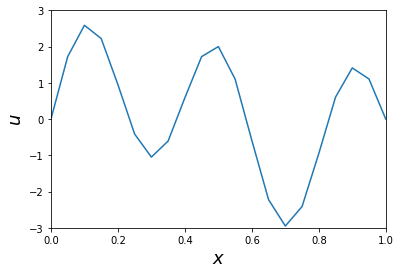

In [1]:
'''
 This script finds a numerical approximation for the solution to
 the following 1D heat equation:
   u_t = u_xx  for  x \in (0,1),  t \in (0,T),
   u(x,t=0) = sin(2*pi*x) + 2*sin(5*pi*x),
   u(x=0,t) = u(x=1,t) = 0,
 using a forward Euler scheme.
''' 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation


## ====== setting parameters =======
# The grid spacing in the x-dimension
dx = 0.05
# The x-dimension grid locations
x = np.arange(0, 1 + dx, dx)
# The number of x-dimension grid divisions
M = np.size(x)-1
# The time step size
dt = 0.001
# The time integration length
T = 0.1
# The number of timesteps
N = np.int(np.floor(T/dt))

# Define the numerical solution 
# the first index is space and the second time
U = np.zeros((M+1,N+1))

# The initial condition
U[:,0] = np.sin(2*np.pi*x) + 2*np.sin(5*np.pi*x)
# enforcing the boundary condition
U[0,0] = 0 
U[-1,0] = 0 

# Form matrix which applies the forward Euler method
mu = dt/dx**2
A = np.diagflat((1-2*mu)*np.ones(M-1))+np.diagflat((mu)*np.ones(M-2),1)+np.diagflat((mu)*np.ones(M-2),-1)

for n in range(N):
    # enforcing the boundary condition
    U[0,n+1] = 0 
    U[-1,n+1] = 0 
    # A single forward Euler timestep
    U[1:M,n+1] = np.dot(A,U[1:M,n])
    

fig, ax = plt.subplots()
ax.set_xlabel(r'$x$', fontsize=18)  # Add an x-label to the axes.
ax.set_ylabel('$u$', fontsize=18)
ax.axis([0,1,-3,3])
l, = ax.plot([],[])
def animate(i):
    l.set_data(x, U[:,i])

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=N)

from IPython.display import HTML
HTML(ani.to_jshtml())    

🚩**Run the script with differing positive values of $\Delta t$. For which values of $\Delta t$ is the scheme stable?** 
(Hint: the condition required for stability is in the form $\Delta t / (\Delta x)^2 \leq C$, for some constant $C > 0$. What is the value of $C$?)


**Solution:** the scheme is stable provided $\Delta t / (\Delta x)^2 \leq 0.5$. 


The exact solution to the initial boundary value problem is
\begin{equation}
  u \left( x, t \right) = e^{-4 \pi^2 t} \sin \left( 2 \pi x \right) + 2 e^{-25 \pi^2 t}\sin \left( 5 \pi x \right).
\end{equation}

🚩 **Plot the exact solution next to the numerical solution for different values of $\Delta t$ and $\Delta x$ and see how closely the numerical approximation follows the exact solution.**

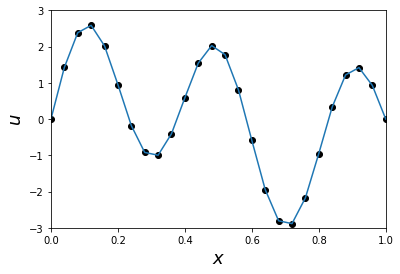

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation


## ====== setting parameters =======
# The grid spacing in the x-dimension
dx = 0.04
# The x-dimension grid locations
x = np.arange(0, 1 + dx, dx)
# The number of x-dimension grid divisions
M = np.size(x)-1
# The time step size
dt = 0.003
# The time integration length
T = 0.05
# The number of timesteps
N = np.int(np.floor(T/dt))

# Define the numerical solution 
# the first index is space and the second time
U = np.zeros((M+1,N+1))
U_exact = np.zeros((M+1,N+1))

# The initial condition
U[:,0] = np.sin(2*np.pi*x) + 2*np.sin(5*np.pi*x)
U_exact[:,0] = np.sin(2*np.pi*x) + 2*np.sin(5*np.pi*x);
# enforcing the boundary condition
U[0,0] = 0 
U[-1,0] = 0 

# Form matrix which applies the forward Euler method
mu = dt/dx**2
A = np.diagflat((1-2*mu)*np.ones(M-1))+np.diagflat((mu)*np.ones(M-2),1)+np.diagflat((mu)*np.ones(M-2),-1)

for n in range(N):
    # enforcing the boundary condition
    U[0,n+1] = 0 
    U[-1,n+1] = 0 
    # A single forward Euler timestep
    U[1:M,n+1] = np.dot(A,U[1:M,n])
    U_exact[:,n+1] = np.exp(-4*np.pi**2*(n+1)*dt)*np.sin(2*np.pi*x)+2*np.exp(-25*np.pi**2*(n+1)*dt)*np.sin(5*np.pi*x);
    

fig, ax = plt.subplots()
ax.set_xlabel(r'$x$', fontsize=18)  # Add an x-label to the axes.
ax.set_ylabel('$u$', fontsize=18)
ax.axis([0,1,-3,3])
l, = ax.plot([],[],'ok')
m, = ax.plot([],[])
def animate(i):
    l.set_data(x, U[:,i])
    m.set_data(x, U_exact[:,i])
    
ani = matplotlib.animation.FuncAnimation(fig, animate, frames=N)

from IPython.display import HTML
HTML(ani.to_jshtml())    

🚩 **Use your completed script from the previous parts to compute and display the two error norms below**
\begin{equation}
  \max_{n \in \left\{ 0, \ldots N \right\}} \left\| \underline{e}^n \right\|_2
    = \max_{n \in \left\{ 0, \ldots N \right\}} \sqrt{\sum_{m = 0}^M e_m^n e_m^n},
\end{equation}
and
\begin{equation}
  \max_{n \in \left\{ 0, \ldots N \right\}} \left\| \underline{e}^n \right\|_{2,\Delta x}
    = \max_{n \in \left\{ 0, \ldots N \right\}} \sqrt{\Delta x \sum_{m = 0}^M e_m^n e_m^n},
\end{equation}
where
\begin{equation}
  e_m^n = U_m^n - u \left( x = x_m = m \Delta x, t = t_n = n \Delta t \right).
\end{equation}


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation


## ====== setting parameters =======
# The grid spacing in the x-dimension
dx = 0.00625;
# The x-dimension grid locations
x = np.arange(0, 1 + dx, dx)
# The number of x-dimension grid divisions
M = np.size(x)-1;
# The time step size
dt = 0.25*dx**2;
# The time integration length
T = 0.1;
# The number of timesteps
N = np.int(np.floor(T/dt))
# Define the numerical solution 
# the first index is space and the second time
U = np.zeros((M+1,N+1))
e_n = np.zeros((M+1))

# The initial condition
U[:,0] = np.sin(2*np.pi*x) + 2*np.sin(5*np.pi*x);
Uexact = np.sin(2*np.pi*x) + 2*np.sin(5*np.pi*x);
# enforcing the boundary condition
U[0,0] = 0 
U[-1,0] = 0 

# Assemble matrix which applies the forward Euler method
mu = dt/dx**2
A = np.diagflat((1-2*mu)*np.ones(M-1))+np.diagflat((mu)*np.ones(M-2),1)+np.diagflat((mu)*np.ones(M-2),-1)

# define nornm vectors
norm2 = np.zeros(N+1)
norm2_dx = np.zeros(N+1)

for n in range(N):
    # enforcing the boundary condition
    U[0,n+1] = 0 
    U[-1,n+1] = 0 
    # A single forward Euler timestep
    U[1:M,n+1] = np.dot(A,U[1:M,n])
    # exact solution 
    Uexact[:] = np.exp(-4*np.pi**2*(n+1)*dt)*np.sin(2*np.pi*x)+2*np.exp(-25*np.pi**2*(n+1)*dt)*np.sin(5*np.pi*x);
    #  cacluate the error at each time step
    e_n[:] = U[:,n+1]-Uexact[:]
    norm2[n+1] = np.sqrt(np.sum(e_n**2))
    norm2_dx[n+1] = np.sqrt(dx*np.sum(e_n**2)) 

max_norm2 = np.max(norm2)
max_norm2_dx = np.max(norm2_dx)

print(max_norm2)
print(max_norm2_dx)

0.0026451581204306233
0.00020911811079626848


Consider $\Delta t = 0.25 (\Delta x)^2$. Use the script above and consider different (and increasingly small) values of $\Delta x$, and estimate the maximum integers $p$ and $q$ such
that
\begin{equation}
  \max_{n \in \left\{ 0, \ldots N \right\}} \left\| \underline{e}^n \right\|_2 = {\cal O} \left( (\Delta x)^{p/2} \right),
\end{equation}
and
\begin{equation}
  \max_{n \in \left\{ 0, \ldots N \right\}} \left\| \underline{e}^n \right\|_{2,\Delta x} = {\cal O} \left( (\Delta x)^{q/2} \right).
\end{equation}

You can do this by calculating the norms for a few values of $\Delta x$ or you can look at the plot of norms as functions of $\Delta x$ in logscale.

---
**Solution**

For example, at $\Delta x = 0.0125$
\begin{align*}
  \max_{n \in \left\{ 0, \ldots N \right\}} \left\| \underline{e}^n \right\|_2 = 7.4915455127640721 \times 10^{-3}, \\
  \max_{n \in \left\{ 0, \ldots N \right\}} \left\| \underline{e}^n \right\|_{2,\Delta x} = 8.3758025115369917 \times 10^{-4},
\end{align*}
while at $\Delta x = 0.00625$
\begin{align*}
  \max_{n \in \left\{ 0, \ldots N \right\}} \left\| \underline{e}^n \right\|_2 = 2.6451581204321338 \times 10^{-3}, \\
  \max_{n \in \left\{ 0, \ldots N \right\}} \left\| \underline{e}^n \right\|_{2,\Delta x} = 2.0911811079638791 \times 10^{-4}.
\end{align*}
Halving $\Delta x$ decreases the first error norm by approximately a factor
of $2^{1.5}$, which suggests $p = 3$. Halving $\Delta x$ decreases the second
error norm by a factor of approximately $4$, which suggests $q = 4$.

This can be better seen in the plot generated by the code below.

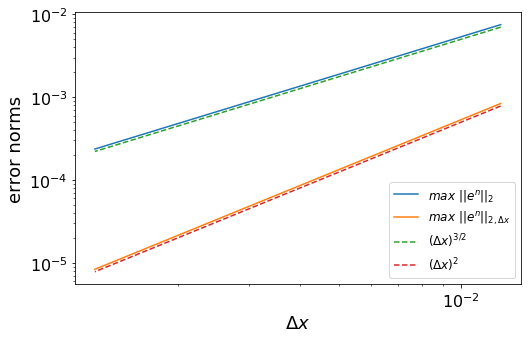

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation


## ====== setting parameters =======
# The grid spacing in the x-dimension
dx_vec =np.array([0.0125, 0.00625, 0.00125])
max_norm2 = np.zeros_like(dx_vec);
max_norm2_dx = np.zeros_like(dx_vec);

for i, dx in enumerate(dx_vec):
    # The x-dimension grid locations
    x = np.arange(0, 1 + dx, dx)
    # The number of x-dimension grid divisions
    M = np.size(x)-1;
    # The time step size
    dt = .25*dx**2;
    # The time integration length
    T = 0.1;
    # The number of timesteps
    N = np.int(np.floor(T/dt))

    # Define the numerical solution 
    # the first index is space and the second time
    U = np.zeros((M+1,N+1))
    e_n = np.zeros((M+1))

    # The initial condition
    U[:,0] = np.sin(2*np.pi*x) + 2*np.sin(5*np.pi*x);
    Uexact = np.sin(2*np.pi*x) + 2*np.sin(5*np.pi*x);

    # enforcing the boundary condition
    U[0,0] = 0 
    U[-1,0] = 0 

    # Assemble matrix which applies the forward Euler method
    mu = dt/dx**2
    A = np.diagflat((1-2*mu)*np.ones(M-1))+np.diagflat((mu)*np.ones(M-2),1)+np.diagflat((mu)*np.ones(M-2),-1)

    # define nornm vectors
    norm2 = np.zeros(N+1)
    norm2_dx = np.zeros(N+1)

    for n in range(N):
        # enforcing the boundary condition
        U[0,n+1] = 0 
        U[-1,n+1] = 0 
        # A single forward Euler timestep
        U[1:M,n+1] = np.dot(A,U[1:M,n])
        # exact solution 
        Uexact[:] = np.exp(-4*np.pi**2*(n+1)*dt)*np.sin(2*np.pi*x)+2*np.exp(-25*np.pi**2*(n+1)*dt)*np.sin(5*np.pi*x);
        #  cacluate the error at each time step
        e_n[:] = U[:,n+1]-Uexact[:]
        norm2[n+1] = np.sqrt(np.sum(e_n**2))
        norm2_dx[n+1] = np.sqrt(dx*np.sum(e_n**2)) 

    max_norm2[i] = np.max(norm2)
    max_norm2_dx[i] = np.max(norm2_dx)

fig, ax = plt.subplots(figsize=(8, 5))    
ax.plot(dx_vec, max_norm2, label = r'$max \ || {e}^n ||_2 $')
ax.plot(dx_vec, max_norm2_dx, label = r'$max \ || {e}^n ||_{2,\Delta x} $')
# Plot the guide lines here 
ax.plot(dx_vec, 5*dx_vec**(1.5),linestyle='--', label = r'$(\Delta x)^{3/2}$')
ax.plot(dx_vec, 5*dx_vec**(2),linestyle='--', label = r'$(\Delta x)^{2}$')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$\Delta x$', fontsize=18)  # Add an x-label to the axes.
ax.set_ylabel('error norms', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax.legend(loc='lower right', fontsize = 12)
plt.show()         

## Backward Euler method for the heat equation


In this part, you should try to implement the backward Euler method for the heat equation. This involves replacing the Forward Euler scheme with
\begin{equation}
  \frac{U_m^{n + 1} - U_m^n}{\Delta t} = \frac{U_{m - 1}^{n + 1} - 2 U_m^{n + 1} + U_{m + 1}^{n + 1}}{(\Delta x)^2} \quad \textrm{ for } m \in \left\{ 1, \ldots, M - 1 \right\}, n \in \left\{ 0, \ldots, N - 1 \right\}.
\end{equation}

Consider the same initial and boundary condition as previous part as well.


🚩 **Using the script below, complete the backward Euler discretisation of the initial boundary value problem, with $\Delta x = 0.02$, $T = 0.1$, and $\Delta t = 0.005$.**

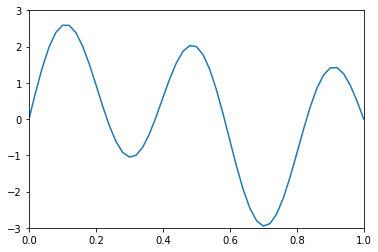

In [5]:
'''
 This script finds a numerical approximation for the solution to
 the following 1D heat equation:
   u_t = u_xx  for  x \in (0,1),  t \in (0,T),
   u(x,t=0) = sin(2*pi*x) + 2*sin(5*pi*x),
   u(x=0,t) = u(x=1,t) = 0,
 using a backward Euler scheme.
''' 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation


## ====== setting parameters =======
# The grid spacing in the x-dimension
dx = 0.02;
# The x-dimension grid locations
x = np.arange(0, 1 + dx, dx)
# The number of x-dimension grid divisions
M = np.size(x)-1;
# The time step size
dt = 0.005;
# The time integration length
T = 0.1;
# The number of timesteps
N = np.int(np.floor(T/dt))

# Define the numerical solution 
# the first index is space and the second time
U = np.zeros((M+1,N+1))

# The initial condition
U[:,0] = np.sin(2*np.pi*x) + 2*np.sin(5*np.pi*x);
# enforcing the boundary condition
U[0,0] = 0 
U[-1,0] = 0 

# Form matrix which applies the backward Euler method
mu = dt/dx**2
A = np.diagflat((1+2*mu)*np.ones(M-1))+np.diagflat((-mu)*np.ones(M-2),1)+np.diagflat((-mu)*np.ones(M-2),-1)
Ainv = np.linalg.inv(A)

for n in range(N):
    # enforcing the boundary condition
    U[0,n+1] = 0 
    U[-1,n+1] = 0 
    # A single backward Euler timestep
    U[1:M,n+1] = np.dot(Ainv,U[1:M,n])
    

fig, ax = plt.subplots()
ax.axis([0,1,-3,3])
l, = ax.plot([],[])
def animate(i):
    l.set_data(x, U[:,i])

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=N)

from IPython.display import HTML
HTML(ani.to_jshtml())    

🚩**Run the script with differing positive values of  $\Delta t / (\Delta x)^2$**. Particularly make your time steps large and see what happens. Is this method stable for some sets of parameters for which forward Euler method was unstable? What is the cost you are paying in backward Euler to have stability at large $\Delta t$?

**Solution:** it is obvious that backward Euler is stable for large $\Delta t$'s where forward Euler is unstable (fails the stability criteria discussed above).  This comes at price of calculating the inverse of discretisation matrix. If we choose $\Delta x$ to be small, $A$ becomes larger and computing its inverse becomes more demanding. 